In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [113]:
!ls ../data

borsa.mp4	  scacchiera.mp4	    tavolo_accappatoio.mp4
fuori_casa.mp4	  taratura.mp4		    tavolo_cucina.mp4
scacchiera_5_low  tavolo_accappatoio_5_low


In [114]:
FILE = '../data/scacchiera_5_low/positions.csv'
WORKSPACE = '../data/scacchiera_5_low'

In [122]:
positions = pd.read_csv(FILE)
diff = positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']].diff()
relative_to_first_frame = positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']] - positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']].iloc[0]

In [124]:
positions

,x,y,z,qx,qy,qz,qw,tx,ty,tz,image
0,-0.766960,3.610584,-2.544051,-0.111715,-0.044188,-0.120406,0.985429,-0.303836,-3.002995,3.314580,0000.png
1,-0.729790,3.735822,-2.217351,-0.117721,-0.048631,-0.120319,0.984530,-0.372153,-3.148723,3.058209,0001.png
2,-0.610071,3.850218,-1.897269,-0.122829,-0.053784,-0.119481,0.983740,-0.511928,-3.276578,2.792484,0002.png
3,-0.441766,3.978504,-1.536798,-0.123192,-0.057220,-0.120744,0.983347,-0.702080,-3.446846,2.451883,0003.png
4,-0.277778,4.087465,-1.149993,-0.110746,-0.038366,-0.143940,0.982621,-0.975578,-3.631056,1.992659,0004.png
...,...,...,...,...,...,...,...,...,...,...,...
228,-1.308271,2.499894,-1.916056,0.006157,0.090643,0.880551,-0.465162,-2.933515,0.623549,1.624189,0228.png
229,-1.030824,2.647189,-1.978572,0.012657,-0.066222,-0.858037,0.509143,-2.980940,0.548485,1.672756,0229.png
230,-0.750187,2.747952,-2.013496,0.024019,-0.053287,-0.837688,0.543012,-2.997379,0.554645,1.695960,0230.png
231,-0.378593,2.849029,-2.009999,0.037315,-0.039113,-0.815597,0.576090,-3.008126,0.634192,1.688010,0231.png


In [125]:
diff

,x,y,z,qx,qy,qz,qw,tx,ty,tz
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.037170,0.125238,0.326700,-0.006006,-0.004443,0.000087,-0.000898,-0.068317,-0.145729,-0.256371
2,0.119719,0.114397,0.320081,-0.005108,-0.005153,0.000838,-0.000790,-0.139775,-0.127854,-0.265725
3,0.168305,0.128285,0.360472,-0.000362,-0.003435,-0.001262,-0.000393,-0.190152,-0.170268,-0.340601
4,0.163987,0.108961,0.386805,0.012446,0.018853,-0.023196,-0.000725,-0.273498,-0.184210,-0.459224
...,...,...,...,...,...,...,...,...,...,...
228,0.341920,0.207784,-0.091891,-0.023434,-0.017335,-0.020358,-0.045844,-0.052169,0.026978,-0.002594
229,0.277447,0.147295,-0.062516,0.006501,-0.156865,-1.738588,0.974305,-0.047426,-0.075064,0.048567
230,0.280637,0.100764,-0.034925,0.011362,0.012935,0.020349,0.033868,-0.016438,0.006160,0.023204
231,0.371593,0.101077,0.003497,0.013296,0.014174,0.022091,0.033078,-0.010747,0.079547,-0.007950


In [126]:
relative_to_first_frame

,x,y,z,qx,qy,qz,qw,tx,ty,tz
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.037170,0.125238,0.326700,-0.006006,-0.004443,0.000087,-0.000898,-0.068317,-0.145729,-0.256371
2,0.156890,0.239635,0.646782,-0.011114,-0.009597,0.000925,-0.001689,-0.208092,-0.273583,-0.522096
3,0.325195,0.367920,1.007254,-0.011477,-0.013032,-0.000338,-0.002082,-0.398244,-0.443851,-0.862697
4,0.489182,0.476881,1.394058,0.000969,0.005821,-0.023534,-0.002807,-0.671742,-0.628061,-1.321921
...,...,...,...,...,...,...,...,...,...,...
228,-0.541310,-1.110689,0.627996,0.117872,0.134831,1.000957,-1.450591,-2.629679,3.626544,-1.690391
229,-0.263863,-0.963395,0.565479,0.124373,-0.022034,-0.737631,-0.476285,-2.677104,3.551479,-1.641825
230,0.016774,-0.862631,0.530555,0.135734,-0.009099,-0.717282,-0.442417,-2.693543,3.557640,-1.618621
231,0.388367,-0.761554,0.534052,0.149030,0.005075,-0.695191,-0.409339,-2.704290,3.637187,-1.626571


In [129]:
x = positions['x']
y = positions['y']
z = positions['z']
tx = positions['tx']
ty = positions['ty']
tz = positions['tz']
qx = positions['qx']
qy = positions['qy']
qz = positions['qz']
qw = positions['qw']

dx = diff['x'][1:]
dy = diff['y'][1:]
dz = diff['z'][1:]
dtx = diff['tx'][1:]
dty = diff['ty'][1:]
dtz = diff['tz'][1:]
dqx = diff['qx'][1:]
dqy = diff['qy'][1:]
dqz = diff['qz'][1:]
dqw = diff['qw'][1:]

fx = relative_to_first_frame['x']
fy = relative_to_first_frame['y']
fz = relative_to_first_frame['z']
ftx = relative_to_first_frame['tx']
fty = relative_to_first_frame['ty']
ftz = relative_to_first_frame['tz']
fqx = relative_to_first_frame['qx']
fqy = relative_to_first_frame['qy']
fqz = relative_to_first_frame['qz']
fqw = relative_to_first_frame['qw']

# Raw plots

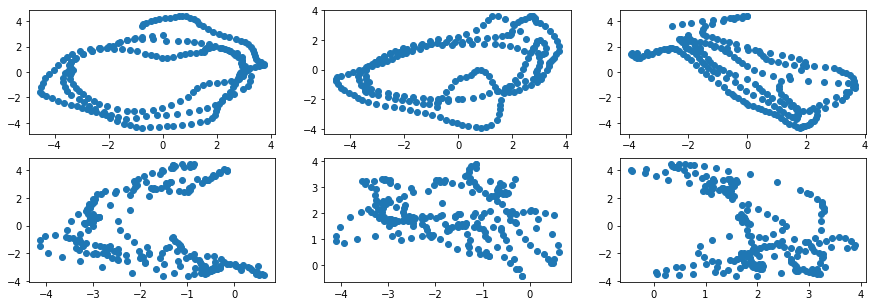

In [119]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

ax[0,0].scatter(x, y)
ax[0,1].scatter(x, z)
ax[0,2].scatter(z, y)
ax[1,0].scatter(tx, ty)
ax[1,1].scatter(tx, tz)
ax[1,2].scatter(tz, ty)
plt.show()

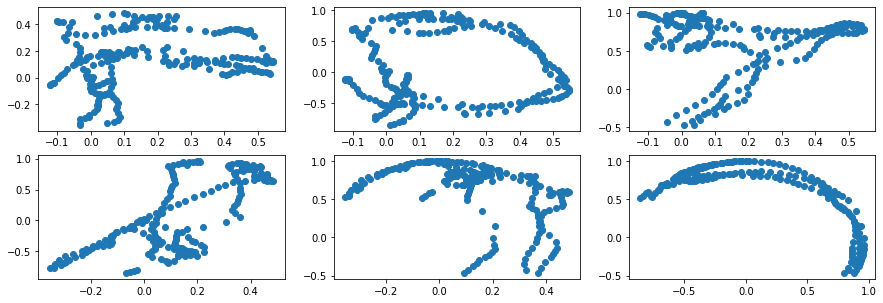

In [131]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

ax[0,0].scatter(qx, qy)
ax[0,1].scatter(qx, qz)
ax[0,2].scatter(qx, qw)
ax[1,0].scatter(qy, qz)
ax[1,1].scatter(qy, qw)
ax[1,2].scatter(qz, qw)
plt.show()

# Diff plots

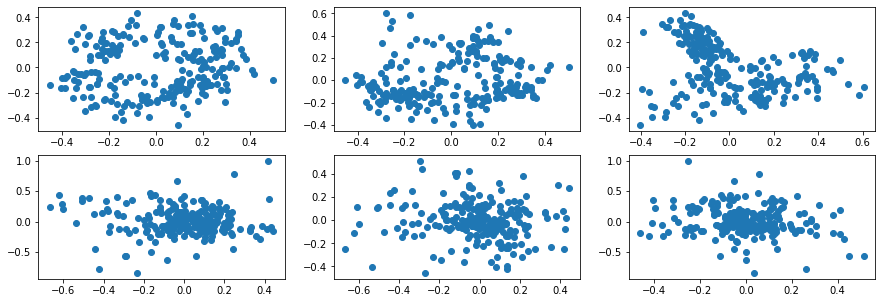

In [120]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

ax[0,0].scatter(dx, dy)
ax[0,1].scatter(dx, dz)
ax[0,2].scatter(dz, dy)
ax[1,0].scatter(dtx, dty)
ax[1,1].scatter(dtx, dtz)
ax[1,2].scatter(dtz, dty)
plt.show()

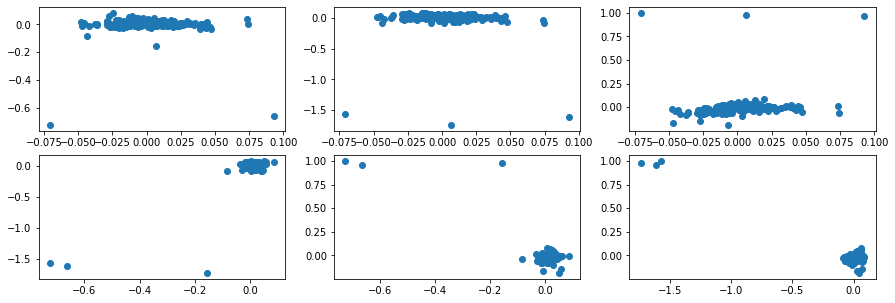

In [132]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

ax[0,0].scatter(dqx, dqy)
ax[0,1].scatter(dqx, dqz)
ax[0,2].scatter(dqx, dqw)
ax[1,0].scatter(dqy, dqz)
ax[1,1].scatter(dqy, dqw)
ax[1,2].scatter(dqz, dqw)
plt.show()

# Relative to first frame

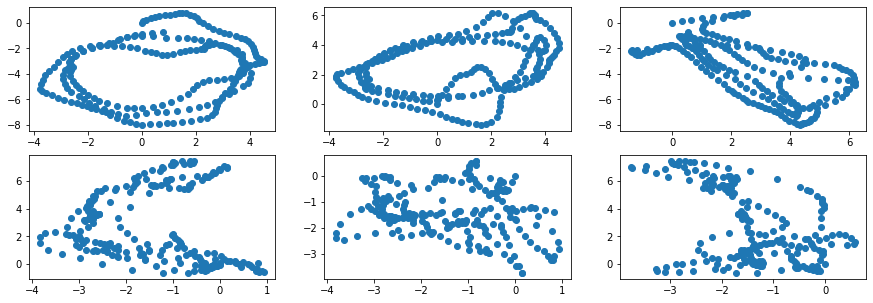

In [128]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

ax[0,0].scatter(fx, fy)
ax[0,1].scatter(fx, fz)
ax[0,2].scatter(fz, fy)
ax[1,0].scatter(ftx, fty)
ax[1,1].scatter(ftx, ftz)
ax[1,2].scatter(ftz, fty)
plt.show()

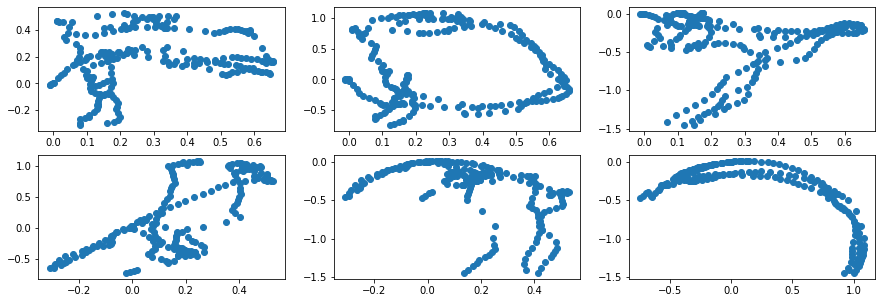

In [133]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

ax[0,0].scatter(fqx, fqy)
ax[0,1].scatter(fqx, fqz)
ax[0,2].scatter(fqx, fqw)
ax[1,0].scatter(fqy, fqz)
ax[1,1].scatter(fqy, fqw)
ax[1,2].scatter(fqz, fqw)
plt.show()

In [81]:
class Frame():
    def __init__(self, x, y, z, qx, qy, qz, qw, tx, ty, tz, image):
        self.x = x
        self.y = y
        self.z = z
        self.qx = qx
        self.qy = qy
        self.qz = qz
        self.qw = qw
        self.tx = tx
        self.ty = ty
        self.tz = tz
        self.image = Image.open(WORKSPACE + "/imgs/" + image)

In [82]:
first_frame = positions.iloc[0]
second_frame = positions.iloc[5]
first_frame, second_frame

(x        -0.76696
 y        3.610584
 z       -2.544051
 qx      -0.111715
 qy      -0.044188
 qz      -0.120406
 qw       0.985429
 tx      -0.303836
 ty      -3.002995
 tz        3.31458
 image    0000.png
 Name: 0, dtype: object,
 x        -0.12054
 y        4.184164
 z       -0.797872
 qx      -0.098308
 qy        -0.0037
 qz      -0.201788
 qw       0.974476
 tx      -1.511948
 ty      -3.655799
 tz        1.58351
 image    0005.png
 Name: 5, dtype: object)

In [83]:
first_frame = Frame(*first_frame)
second_frame = Frame(*second_frame)

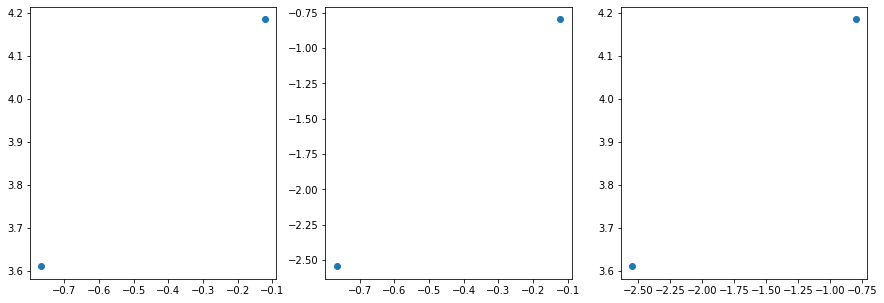

In [84]:
x = [first_frame.x, second_frame.x]
y = [first_frame.y, second_frame.y]
z = [first_frame.z, second_frame.z]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(x, y)
ax2.scatter(x, z)
ax3.scatter(z, y)
plt.show()

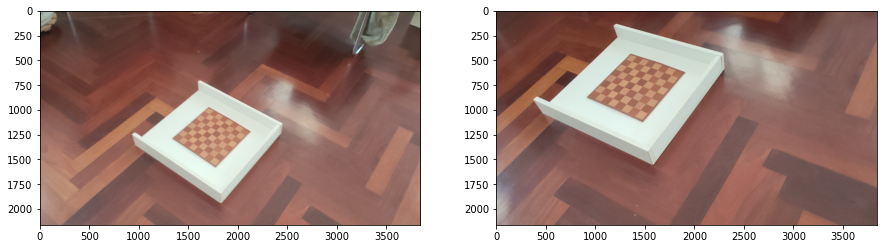

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(first_frame.image)
ax2.imshow(second_frame.image)
plt.show()